# 반드시 들어가야 하는 내용
* 목표 : 다음 분기에 어떤 게임을 설계해야 할까

</br>

* 지역에 따라서 선호하는 게임 장르가 다를까?
* 연도별 게임의 트렌드가 있을까?
* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgames2.csv', index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
df_copy = df.copy()

# EDA 과정

Data Description
* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 배급한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

## 품질의 문제

### 시각적 탐색

In [4]:
df_copy.sample(10)

# Name : 중복값,결측값이 존재하면 안될듯 -> 중복값과 결측값 찾아서 삭제
# platform : 결측값이 존재하면 안됨 -> 결측값을 etc 로 처리
# Year : 소수점으로 표현되어있음 -> int로 바꾸고 결측치와 이상치 처리
# Genre : 결측값이 존재하면 안됨 -> 결측값을 Misc 로 처리
# Publisher : 결측값이 존재하면 안됨 -> 결측값을 Unknown 으로 처리
# Sales : 소수점으로 표현되어 있으며 중간에 K,M 표현이 섞여있음 -> 단위를 K로 일치시키고 정수로 표현

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6070,NBA ShootOut 2001,PS,2000.0,Sports,Sony Computer Entertainment,0.15,0.1,0,0.02
15037,Rayman Raving Rabbids: TV Party,DS,2008.0,Misc,Ubisoft,0.44,0.01,0,0.04
13501,Tony Hawk's Proving Ground,X360,2007.0,Sports,Activision,0.49,0.02,0,0.04
8092,Inazuma Eleven Strikers 2012 Xtreme,Wii,2011.0,Role-Playing,Level 5,0,0,0.19,0
7393,Titanfall,XOne,2014.0,Shooter,Electronic Arts,1.84,0.8,0.04,0.22
16090,Spider-Man: Shattered Dimensions,DS,2010.0,Action,Activision,0.17,0.01,0M,0.01
2757,MVP 06 NCAA Baseball,XB,2006.0,Sports,Electronic Arts,0.25,0.07,0,0.01
14168,Tokimeki Memorial 2,PS,1999.0,Simulation,Konami Digital Entertainment,0,0,0.36,0.03
6649,101-in-1 Explosive Megamix,DS,2008.0,Puzzle,Nordcurrent,0.05,0.13,0,0.02
4285,Jikkyou Powerful Pro Yakyuu 2013,PS3,2013.0,Sports,Konami Digital Entertainment,0,0,0.26,0


### 프로그래매틱 탐색

In [5]:
df_copy.info()

# year, genre, publisher 칼럼에 결측치 존재
# year 칼럼이 float 형태
# sales 칼럼들이 object 형태

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [6]:
df_copy[df_copy.duplicated()]

# name 중복값 존재

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [7]:
df_copy.query('Year <= 1900').head(10)

# year 칼럼의 이상치 존재

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
75,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
82,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
214,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
769,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
907,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96.0,Racing,ASCII Entertainment,0,0,0.9,0
1016,Wolfenstein,PC,9.0,Shooter,Activision,0.01,0.03,0,0.01
1221,Ratchet & Clank: Going Commando,PS2,3.0,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1365,LEGO Star Wars II: The Original Trilogy,PS2,6.0,Action,LucasArts,1.85,0.64,0.01,0.19
1410,Rogue Warrior,PS3,9.0,Shooter,Bethesda Softworks,0.11,0.02,0,0.01


## 데이터 정제

In [8]:
# name 칼럼 중복값 제거

df_copy = df_copy.drop_duplicates()
df_copy[df_copy.duplicated()]
df_copy = df_copy.reset_index(drop=True)

In [9]:
# genre 칼럼 결측치 처리

df_copy['Genre'] = df_copy['Genre'].fillna('Misc')
df_copy['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1784
Role-Playing    1483
Shooter         1307
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [10]:
# publisher 칼럼 결측치 처리

df_copy['Publisher'] = df_copy['Publisher'].fillna('Unknown')
df_copy['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Game Arts                          1
Max Five                           1
CCP                                1
Quelle                             1
Just Flight                        1
Name: Publisher, Length: 578, dtype: int64

In [11]:
# sales 칼럼에서 문자가 포함된 부분 처리

df_copy.NA_Sales = df_copy.NA_Sales.str.replace('K','000000')
df_copy.NA_Sales = df_copy.NA_Sales.str.replace('M','')
df_copy.NA_Sales = df_copy.NA_Sales.astype('float')

df_copy.EU_Sales = df_copy.EU_Sales.str.replace('K','000000')
df_copy.EU_Sales = df_copy.EU_Sales.str.replace('M','')
df_copy.EU_Sales = df_copy.EU_Sales.astype('float')

df_copy.JP_Sales = df_copy.JP_Sales.str.replace('K','000000')
df_copy.JP_Sales = df_copy.JP_Sales.str.replace('M','')
df_copy.JP_Sales = df_copy.JP_Sales.astype('float')

df_copy.Other_Sales = df_copy.Other_Sales.str.replace('K','000000')
df_copy.Other_Sales = df_copy.Other_Sales.str.replace('M','')
df_copy.Other_Sales = df_copy.Other_Sales.astype('float')

In [12]:
df_copy.query('NA_Sales > 100')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480000000.0,0.33,0.00,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60000000.0,0.08,0.16,0.03
1359,Warhawk,PS3,2007.0,Simulation,Sony Computer Entertainment,490000000.0,0.39,0.00,0.17
1456,Colony Wars,PS,1997.0,Simulation,Psygnosis,240000000.0,0.16,0.00,0.03
1838,Trace Memory,DS,2005.0,Adventure,Nintendo,150000000.0,0.01,0.12,0.01
...,...,...,...,...,...,...,...,...,...
15621,Justice League: Chronicles,GBA,2003.0,Platform,Midway Games,30000000.0,0.01,0.00,0.00
16193,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120000000.0,0.15,0.00,0.06
16329,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720000000.0,0.56,0.00,0.19
16491,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470000000.0,0.18,0.00,0.12


In [13]:
for i in range(len(df_copy['NA_Sales'])):
    if df_copy['NA_Sales'][i] > 1000:
        df_copy['NA_Sales'][i] = df_copy['NA_Sales'][i] / 1000000
    else:
        df_copy['NA_Sales'][i] = df_copy['NA_Sales'][i] * 1000

for i in range(len(df_copy['EU_Sales'])):
    if df_copy['EU_Sales'][i] > 1000:
        df_copy['EU_Sales'][i] = df_copy['EU_Sales'][i] / 1000000
    else:
        df_copy['EU_Sales'][i] = df_copy['EU_Sales'][i] * 1000

for i in range(len(df_copy['JP_Sales'])):
    if df_copy['JP_Sales'][i] > 1000:
        df_copy['JP_Sales'][i] = df_copy['JP_Sales'][i] / 1000000
    else:
        df_copy['JP_Sales'][i] = df_copy['JP_Sales'][i] * 1000

for i in range(len(df_copy['Other_Sales'])):
    if df_copy['Other_Sales'][i] > 1000:
        df_copy['Other_Sales'][i] = df_copy['Other_Sales'][i] / 1000000
    else:
        df_copy['Other_Sales'][i] = df_copy['Other_Sales'][i] * 1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by 

In [14]:
df_copy['NA_Sales'] = df_copy['NA_Sales'].astype(int)
df_copy['EU_Sales'] = df_copy['EU_Sales'].astype(int)
df_copy['JP_Sales'] = df_copy['JP_Sales'].astype(int)
df_copy['Other_Sales'] = df_copy['Other_Sales'].astype(int)

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16597 non-null  object 
 4   Publisher    16597 non-null  object 
 5   NA_Sales     16597 non-null  int64  
 6   EU_Sales     16597 non-null  int64  
 7   JP_Sales     16597 non-null  int64  
 8   Other_Sales  16597 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.1+ MB


In [16]:
# year 칼럼 결측치, 이상치 처리, int 형태로 변경
# 1) year 를 제거한 데이터와 보존한 데이터로 분리

df_region = df_copy.drop('Year', axis=1)
df_region.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,Action,Destineer,40,0,0,0
1,The Munchables,Wii,Action,Namco Bandai Games,170,0,0,10
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0,0,20,0
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,40,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,120,90,0,40


In [17]:
df_year = df_copy.drop(df_copy[df_copy['Year'].isnull()].index)
df_year.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170,0,0,10
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120,90,0,40


In [18]:
# year 칼럼의 타입을 int로 변환

df_year['Year'] = df_year['Year'].astype(int)

In [19]:
# year 칼럼의 연도를 4자리 숫자로 변환

df_year.query('Year < 1900')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,10,120,0,30
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,100,70,0,10
213,NASCAR Unleashed,PS3,11,Racing,Activision,90,0,0,10
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,20,0,0
768,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,530,410,0,140
...,...,...,...,...,...,...,...,...,...
15984,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,20,0
16102,Fab 5 Soccer,DS,8,Sports,Destineer,10,0,0,0
16148,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,240,180,30,50
16393,Point Blank 3,PS,0,Shooter,Namco Bandai Games,10,10,0,0


In [20]:
def convert(df):
    for i, year in enumerate(df.Year):
        if df.iloc[i,2] < 50:
            df.iloc[i,2] = df.iloc[i,2] + 2000
        elif df.iloc[i,2] < 100:
            df.iloc[i,2] = df.iloc[i,2] + 1900
    return df

In [21]:
df_year = convert(df_year)
df_year['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

# 데이터 분석

## 1. df_year

In [22]:
df_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150,40,0,10
16593,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10,0,0,0
16594,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440,190,30,130
16595,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50,50,250,30


- 칼럼 : platform, year, genre, sales

</br>

- year - platform : 연도별 플랫폼별 발매수
- year - genre : 연도별 장르별 발매수 (mission)
- year - sales : 연도별 지역별 매출액
- year - platform - sales : 연도별 플랫폼별 매출액
- year - genre - sales : 연도별 장르별 매출액 (mission)

### 1) year - platform

연도별 플랫폼별 발매수

In [23]:
df_yp = df_year[['Name','Year','Platform']]
df_yp = df_yp.groupby(['Year','Platform'], as_index=False)['Name'].count()
df_yp.head()

,Year,Platform,Name
0,1980,2600,9
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1983,NES,6


Text(0.5, 1.0, 'Year-Plaform')

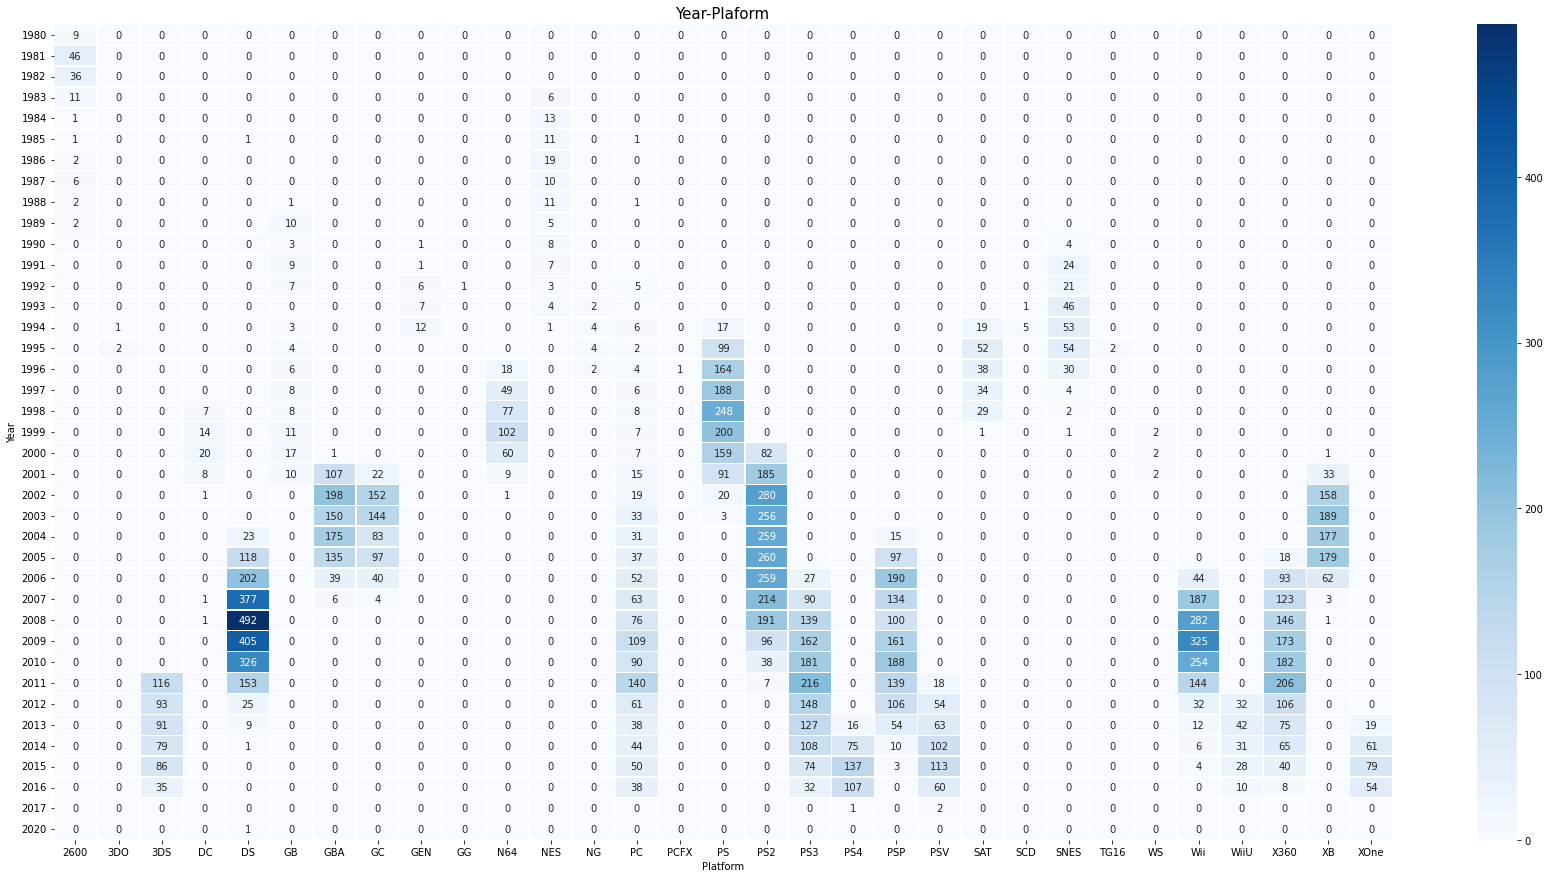

In [24]:
df_yp_pivot = df_yp.pivot_table(values='Name', index='Year', columns='Platform', fill_value=0)

plt.figure(figsize=(30,15))
sns.heatmap(df_yp_pivot, annot=True, fmt='d', linewidths=0.5, cmap='Blues')
plt.title('Year-Plaform', fontsize=15)

* 해석

ps는 90년대 중반부터 2010년 중반까지 활발하게 타이틀을 출시하고 있는 가운데, 2000년대 중반에 ds가 폭발적으로 타이틀을 발매하였고 그 뒤를 이어 wii와 xb가 따르고 있다. pc의 경우 2000년대를 지나면서 발매가 늘었다가 2011년을 기점으로 다시 줄어드는 모습이다.

### 2) year - genre

연도별 장르별 발매수 (mission)

In [25]:
df_yg = df_year[['Name','Year','Genre']]
df_yg = df_yg.groupby(['Year','Genre'], as_index=False)['Name'].count()
df_yg.head()

,Year,Genre,Name
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,5
3,1980,Shooter,2
4,1981,Action,25


Text(0.5, 1.0, 'Year-Genre')

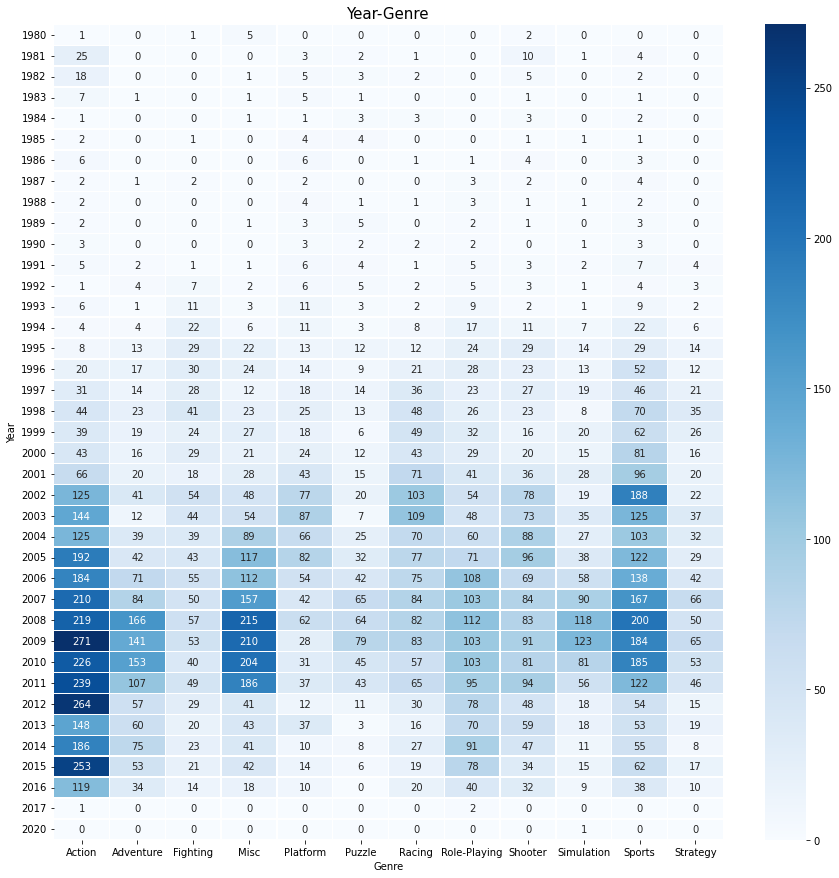

In [26]:
df_yg_pivot = df_yg.pivot_table(values='Name', index='Year', columns='Genre', fill_value=0)

plt.figure(figsize=(15,15))
sns.heatmap(df_yg_pivot, annot=True, fmt='d', linewidths=0.5, cmap='Blues')
plt.title('Year-Genre', fontsize=15)

* 해석

2000년대로 들어오면서 다양한 장르의 게임이 출시되기 시작했다. 액션, 어드벤쳐, 롤플레잉, 스포츠, 기타 장르의 게임이 2010년까지 활발하게 출시되다가 2010년을 넘어서면 액션 장르의 게임이 주류로 자리잡게 되었다. 그 뒤를 이어 롤플레잉와 어드벤쳐, 스포츠 장르의 게임이 발매되고 있다.

### 3) year - sales

연도별 지역별 매출액

In [78]:
df_ys = df_year[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_ys = df_ys.groupby('Year', as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
df_ys['total_sales'] = df_ys['NA_Sales'] + df_ys['EU_Sales'] + df_ys['JP_Sales'] + df_ys['Other_Sales']
df_ys.sort_values('NA_Sales', ascending=False).head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
28,2008,351439,184400,60260,82390,678489
29,2009,338849,191590,61890,74770,667099
27,2007,312050,160499,60290,77600,610439
30,2010,304240,176730,59490,59900,600360
26,2006,263120,129240,73730,54430,520520


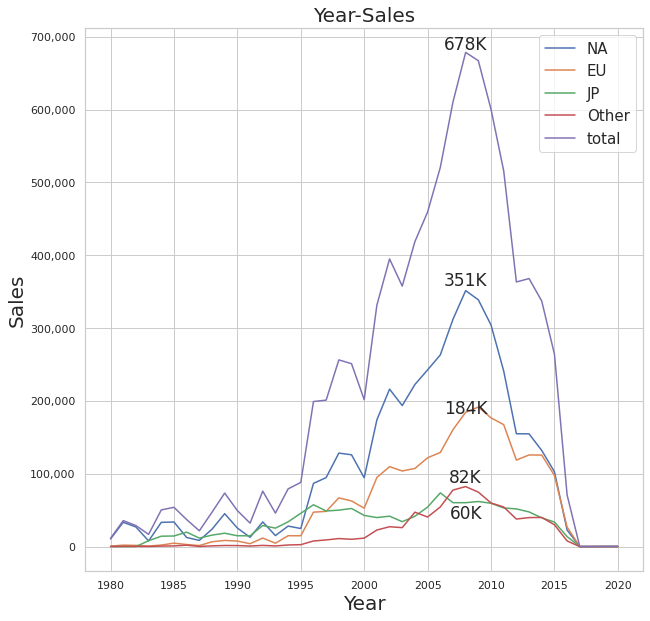

In [84]:
plt.figure(figsize=(10,10))
sns.set_theme(style='whitegrid')
sns.lineplot(data=df_ys, x='Year', y='NA_Sales')
sns.lineplot(data=df_ys, x='Year', y='EU_Sales')
sns.lineplot(data=df_ys, x='Year', y='JP_Sales')
sns.lineplot(data=df_ys, x='Year', y='Other_Sales')
sns.lineplot(data=df_ys, x='Year', y='total_sales')
plt.title('Year-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.annotate('351K',(2008,365000), va='center', ha='center', fontsize=17)
plt.annotate('184K',(2008,190000), va='center', ha='center', fontsize=17)
plt.annotate('60K',(2008,45000), va='center', ha='center', fontsize=17)
plt.annotate('82K',(2008,95000), va='center', ha='center', fontsize=17)
plt.annotate('678K',(2008,690000), va='center', ha='center', fontsize=17)
current = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current])
plt.legend(['NA','EU','JP','Other','total'], fontsize=15)
plt.show()

* 해석

90년대 중반까지는 미국과 일본이 주요시장이었지만, 2000년을 넘어서면서 EU가 급부상하기 시작했다. 2005년부터 2010년까지 세계 게임시장의 호황기가 찾아왔으며 미국이 가장 큰 시장이고 그 뒤를 이어 EU가 차지했다.

### 4) year - platform - sales

연도별 플랫폼별 매출액

In [29]:
df_yps = df_year[['Year','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_yps = df_yps.groupby(['Year','Platform'], as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
df_yps['total_sales'] = df_yps['NA_Sales'] + df_yps['EU_Sales'] + df_yps['JP_Sales'] + df_yps['Other_Sales']
df_yps.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.00000
mean,2002.659751,17980.991701,9996.331950,5329.045643,3273.896266,36580.26556
std,9.127819,25173.786989,14797.128218,7444.783151,5846.079399,48692.19798
min,1980.000000,0.000000,0.000000,0.000000,0.000000,20.00000
25%,1996.000000,820.000000,420.000000,40.000000,80.000000,3280.00000
50%,2003.000000,6390.000000,3480.000000,1950.000000,630.000000,14750.00000
75%,2011.000000,26979.000000,11780.000000,8100.000000,3050.000000,50080.00000
max,2020.000000,116540.000000,65270.000000,38560.000000,39850.000000,211809.00000


In [30]:
# 4분위 50% 이상의 값만 추출

df_yps_na50 = df_yps.query('NA_Sales >= 6390')
df_yps_eu50 = df_yps.query('EU_Sales >= 3480')
df_yps_jp50 = df_yps.query('JP_Sales >= 1950')
df_yps_other50 = df_yps.query('Other_Sales >= 630')
df_yps_total50 = df_yps.query('total_sales >= 14750')

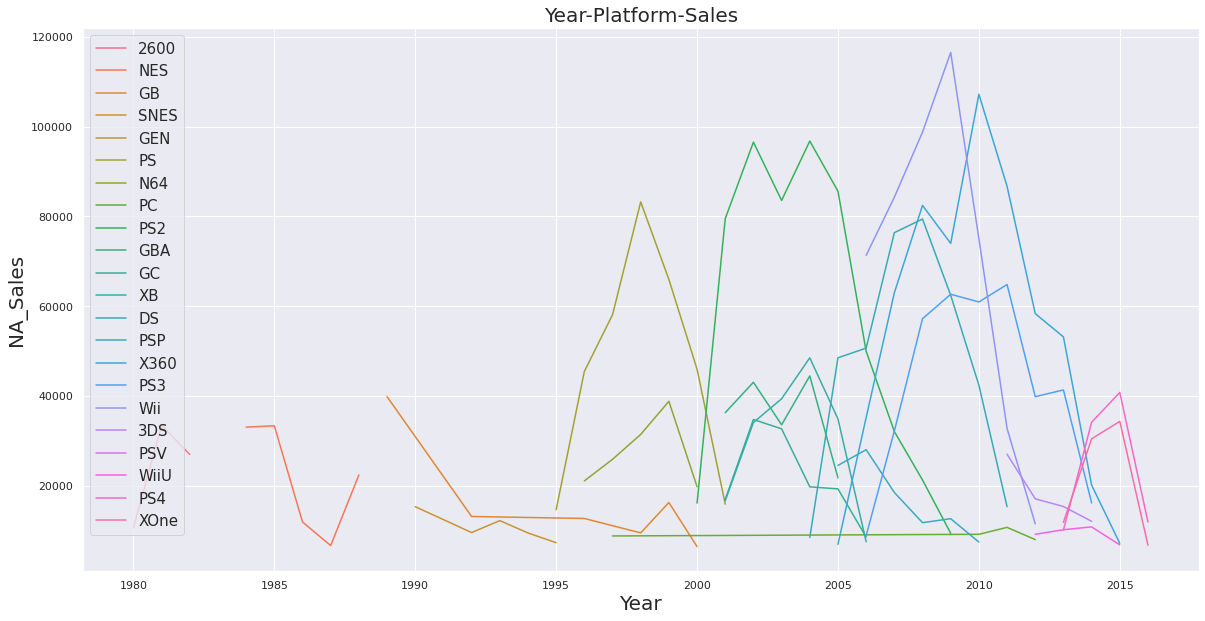

In [31]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_yps_na50, x='Year', y='NA_Sales', hue='Platform')
plt.title('Year-Platform-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('NA_Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [32]:
df_yps.query('Year == 2015').sort_values('NA_Sales', ascending=False).head()

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
223,2015,PS4,40760,50430,6190,17860,115240
229,2015,XOne,34290,17980,170,5230,57670
228,2015,X360,7110,4770,0,1140,13020
227,2015,WiiU,6770,4900,3410,1290,16370
220,2015,3DS,5820,4770,15390,990,26970


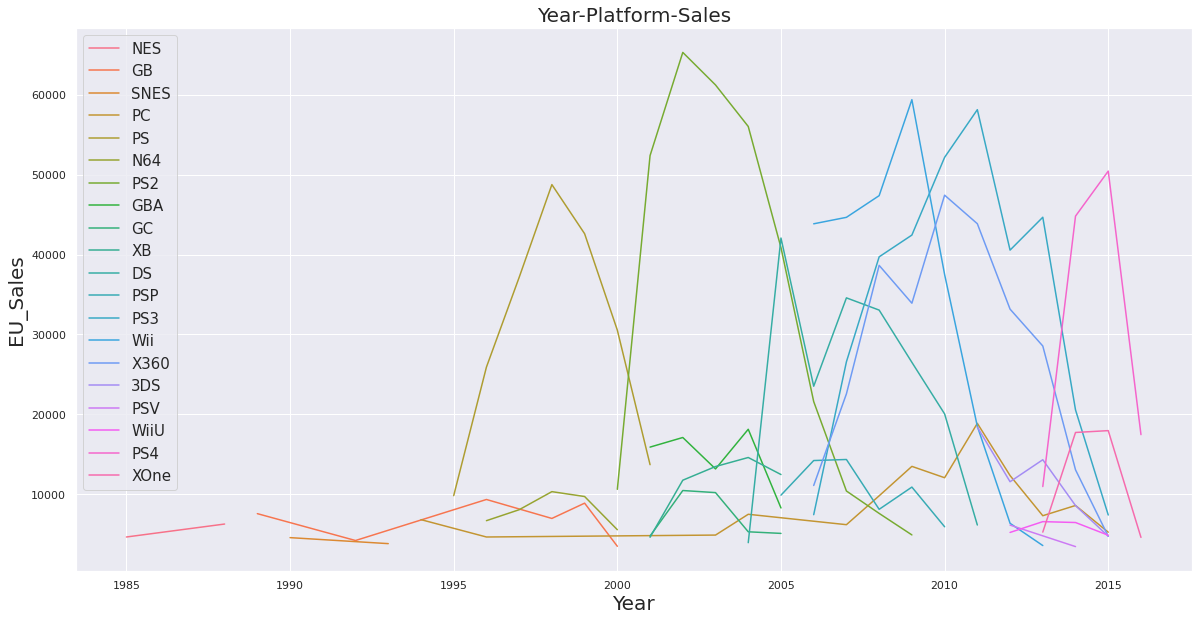

In [33]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_yps_eu50, x='Year', y='EU_Sales', hue='Platform')
plt.title('Year-Platform-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('EU_Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [34]:
df_yps.query('Year == 2015').sort_values('EU_Sales', ascending=False).head()

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
223,2015,PS4,40760,50430,6190,17860,115240
229,2015,XOne,34290,17980,170,5230,57670
222,2015,PS3,4760,7430,3670,2350,18210
221,2015,PC,2200,5280,0,550,8030
227,2015,WiiU,6770,4900,3410,1290,16370


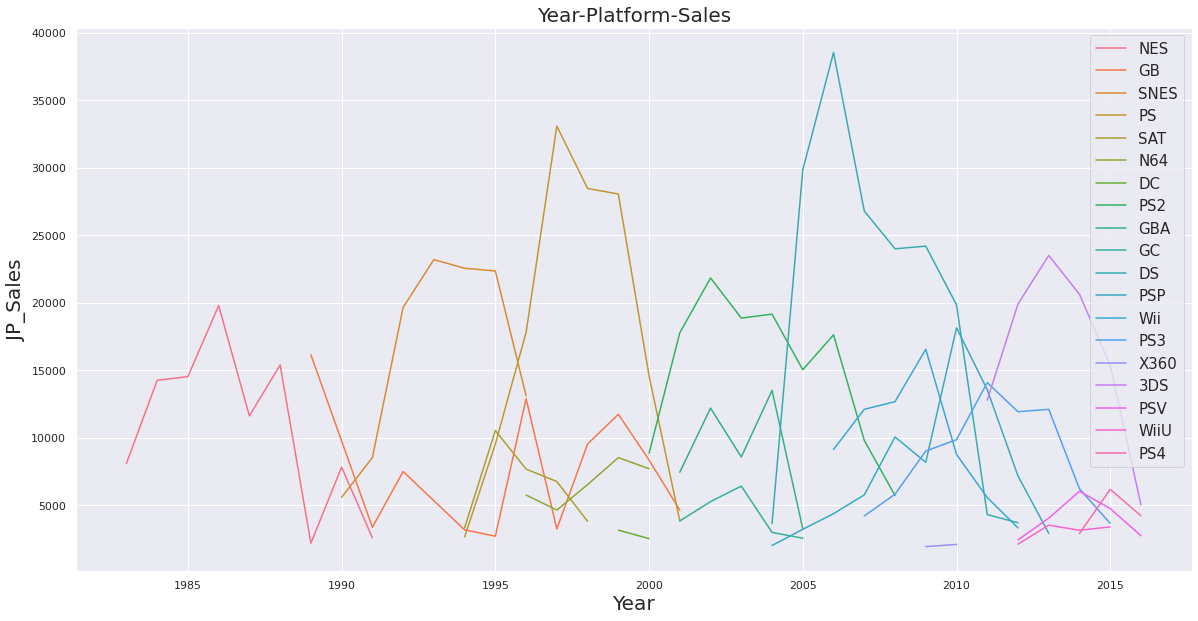

In [35]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_yps_jp50, x='Year', y='JP_Sales', hue='Platform')
plt.title('Year-Platform-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('JP_Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [36]:
df_yps.query('Year == 2015').sort_values('JP_Sales', ascending=False).head()

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
220,2015,3DS,5820,4770,15390,990,26970
223,2015,PS4,40760,50430,6190,17860,115240
225,2015,PSV,540,1280,4770,480,7070
222,2015,PS3,4760,7430,3670,2350,18210
227,2015,WiiU,6770,4900,3410,1290,16370


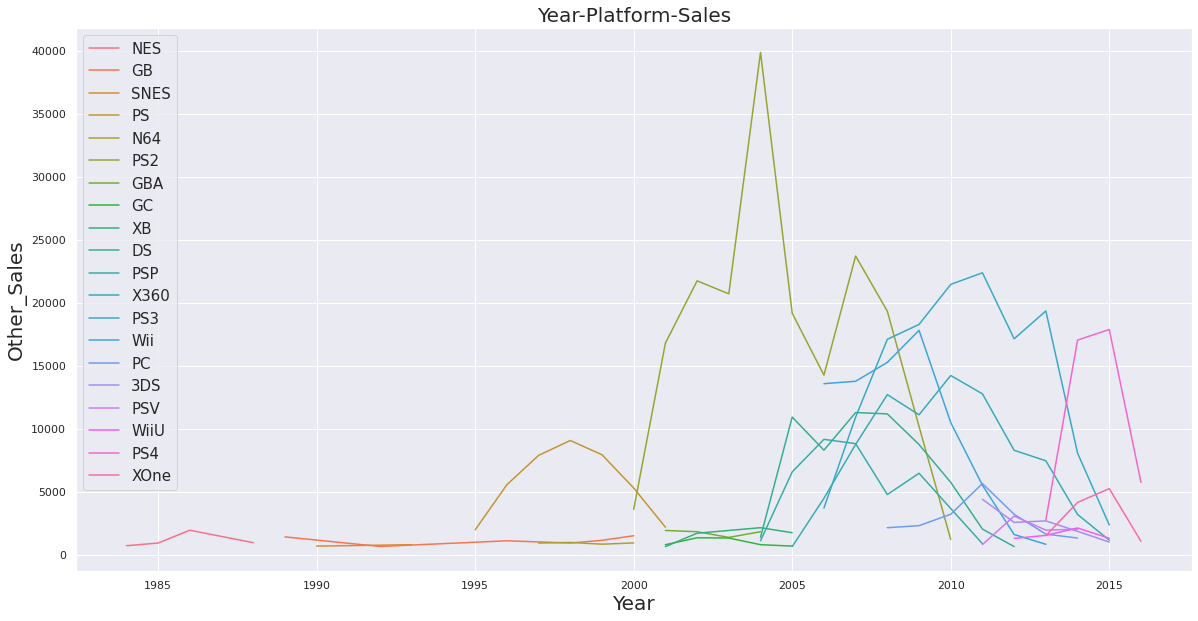

In [37]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_yps_other50, x='Year', y='Other_Sales', hue='Platform')
plt.title('Year-Platform-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Other_Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [38]:
df_yps.query('Year == 2015').sort_values('Other_Sales', ascending=False).head()

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
223,2015,PS4,40760,50430,6190,17860,115240
229,2015,XOne,34290,17980,170,5230,57670
222,2015,PS3,4760,7430,3670,2350,18210
227,2015,WiiU,6770,4900,3410,1290,16370
228,2015,X360,7110,4770,0,1140,13020


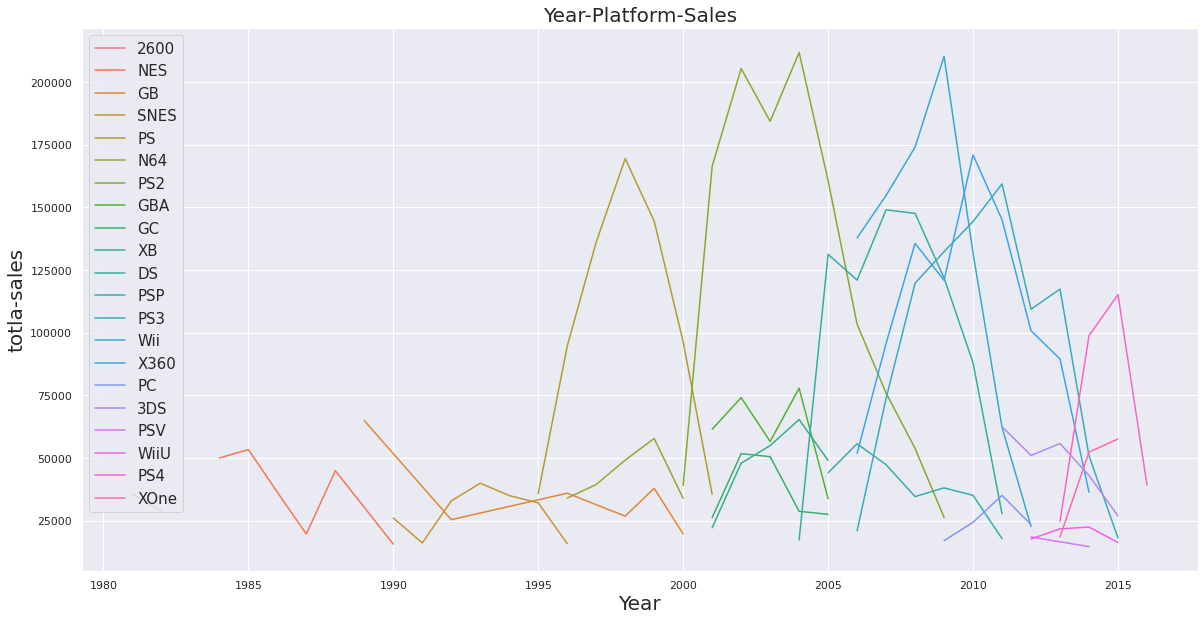

In [39]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_yps_total50, x='Year', y='total_sales', hue='Platform')
plt.title('Year-Platform-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('totla-sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [40]:
df_yps.query('Year == 2015').sort_values('total_sales', ascending=False).head()

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
223,2015,PS4,40760,50430,6190,17860,115240
229,2015,XOne,34290,17980,170,5230,57670
220,2015,3DS,5820,4770,15390,990,26970
222,2015,PS3,4760,7430,3670,2350,18210
227,2015,WiiU,6770,4900,3410,1290,16370


* 해석

90년대 중반부터 ps의 매출이 올라가고 ps2, ps3를 이어서 유지되고 있다.
2000년대 중반 ds의 매출이 급격히 올라갔지만 ps를 따라잡지는 못했다.
2010년대 초반에는 x360의 성장이 두드러진다. 일본의 경우 2010년대 이후 3ds의 매출이 크게 상승하였다.

### 5) year - genre - sales

연도별 장르별 시장점유율 (mission)

In [104]:
df_ygs = df_year[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_ygs = df_ygs.groupby(['Year','Genre'], as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
df_ygs['total_sales'] = df_ygs['NA_Sales'] + df_ygs['EU_Sales'] + df_ygs['JP_Sales'] + df_ygs['Other_Sales']
df_ygs1 = df_ygs[(df_ygs['Genre'] == 'Action')|(df_ygs['Genre'] == 'Sports')|(df_ygs['Genre'] == 'Shooter')|(df_ygs['Genre'] == 'Role-Playing')|(df_ygs['Genre'] == 'Misc')]

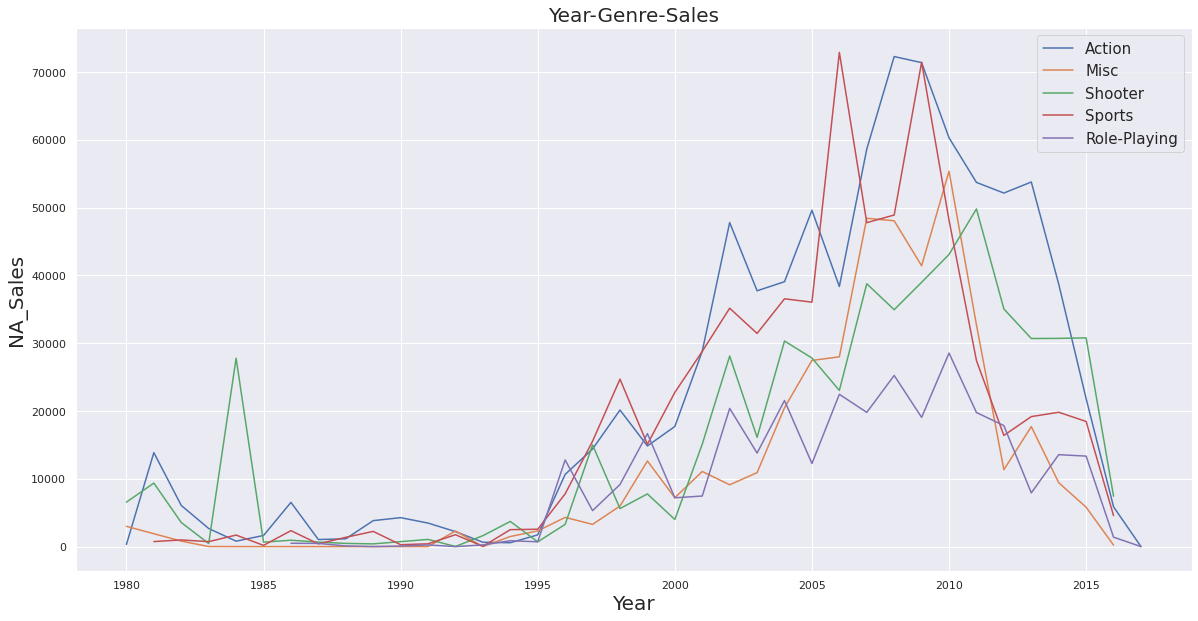

In [105]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_ygs1, x='Year', y='NA_Sales', hue='Genre')
plt.title('Year-Genre-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('NA_Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

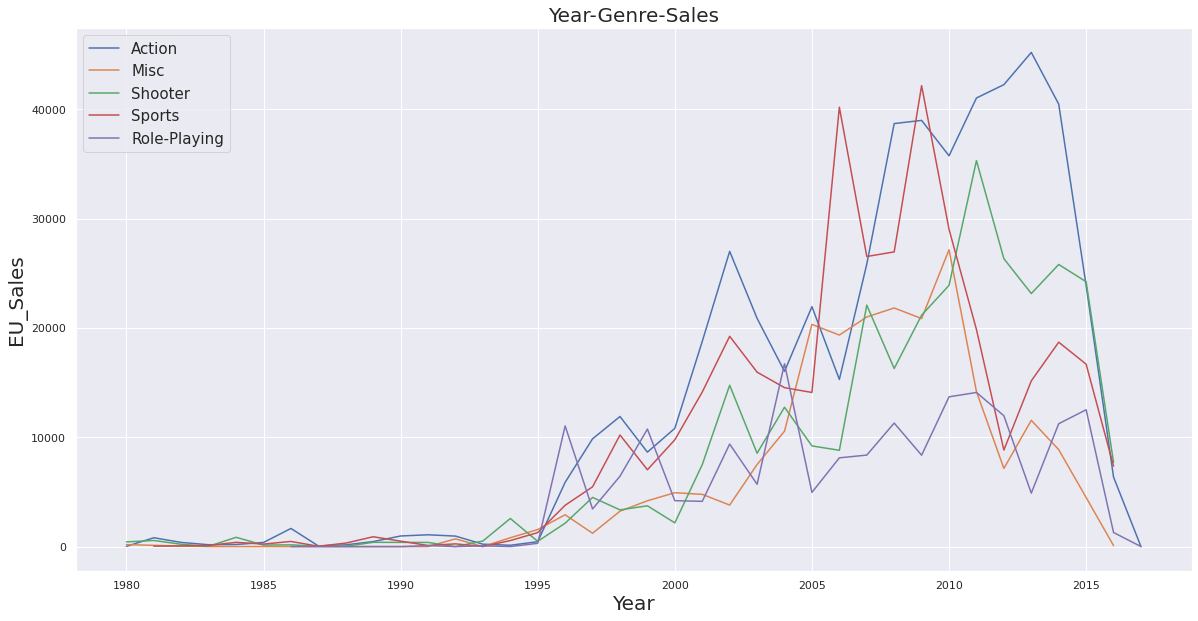

In [109]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_ygs1, x='Year', y='EU_Sales', hue='Genre')
plt.title('Year-Genre-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('EU_Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

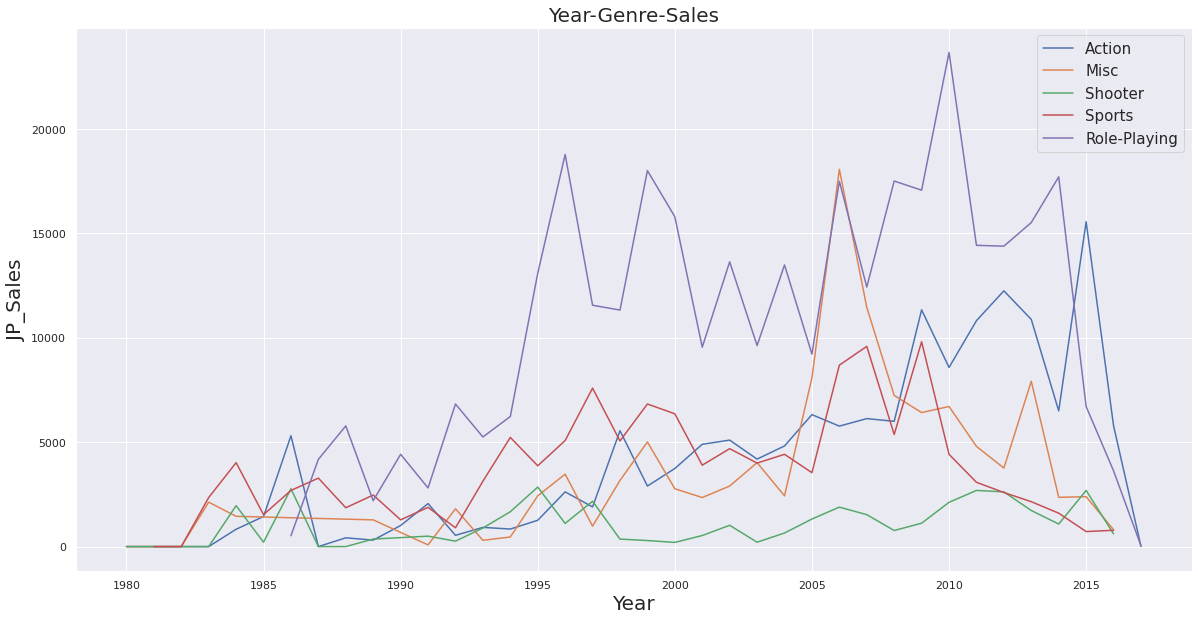

In [108]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_ygs1, x='Year', y='JP_Sales', hue='Genre')
plt.title('Year-Genre-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('JP_Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

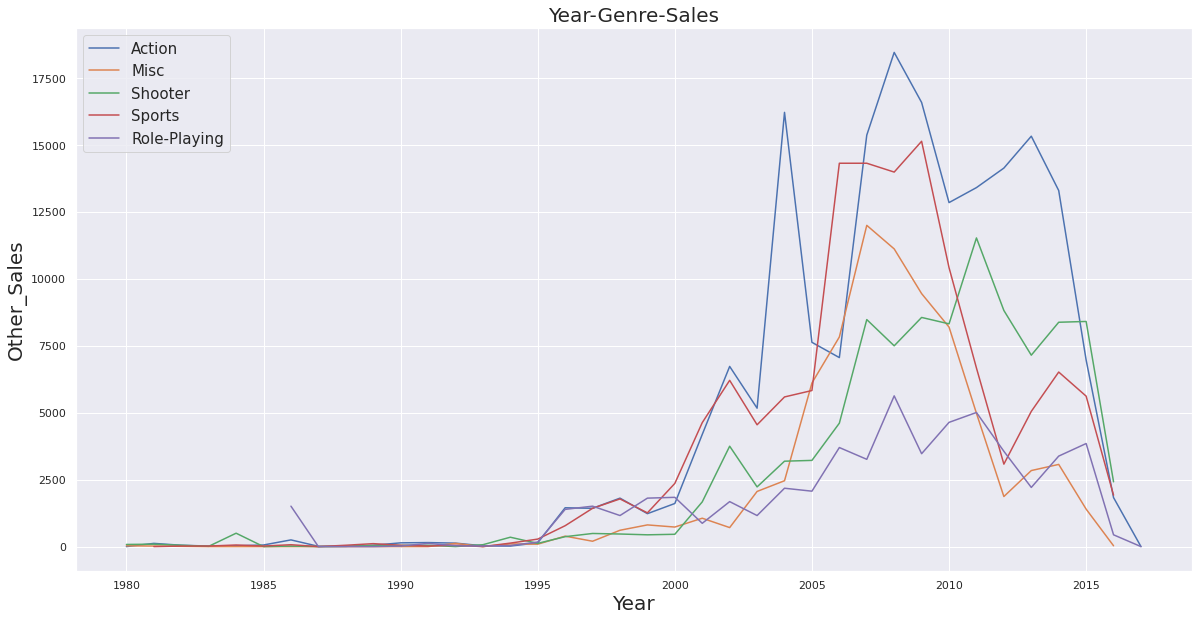

In [107]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_ygs1, x='Year', y='Other_Sales', hue='Genre')
plt.title('Year-Genre-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Other_Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

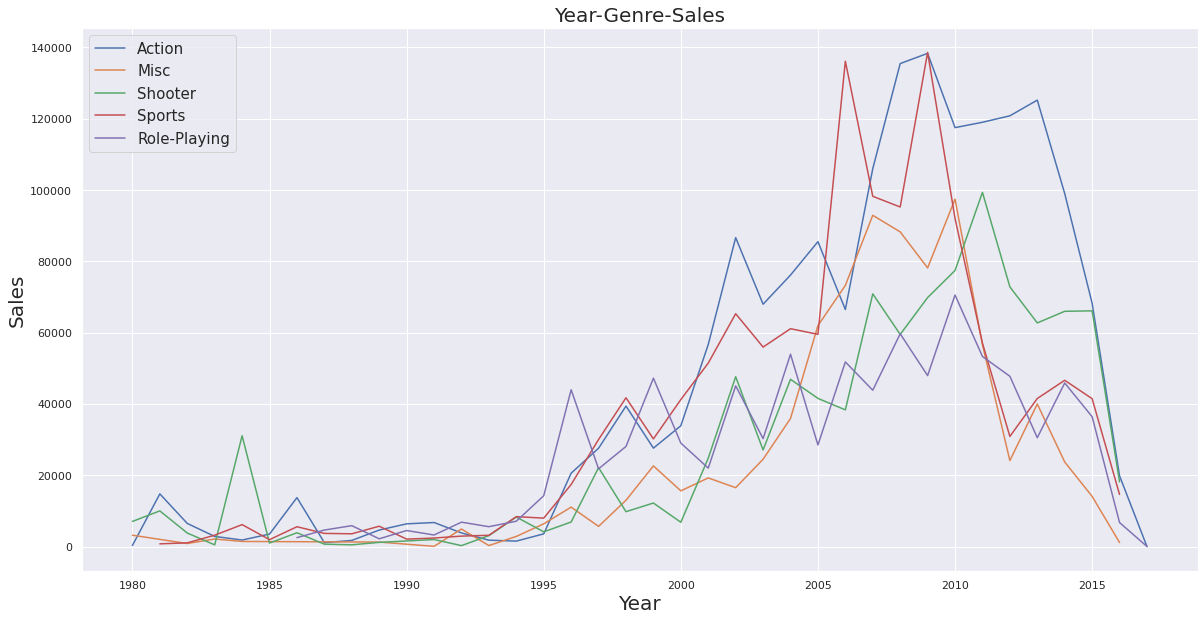

In [106]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df_ygs1, x='Year', y='total_sales', hue='Genre')
plt.title('Year-Genre-Sales', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

* 해석

2000년대부터 액션과 스포츠장르의 매출이 크게 뛰었다. 그 뒤를 이어 기타장르와 슈팅장르의 매출이 차지했다. 2010년 이후 액션장르의 매출이 떨어지면서 슈팅장르의 매출이 따라잡게 되었다. 일본의 경우 90년대부터 롤플레잉 장르의 강세가 이어지다 2015년 액션장르에게 역전되었다.

In [50]:
df_ygs1 = df_year[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_ygs1 = df_ygs1.groupby(['Year','Genre'], as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
df_ygs1 = df_ygs1.sort_values('NA_Sales', ascending=False)
df_ygs1.reset_index(drop=True, inplace=True)
df_ygs1.head(10)

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2006,Sports,72910,40200,8690,14320
1,2008,Action,72299,38700,6000,18460
2,2009,Sports,71469,42170,9810,15140
3,2009,Action,71400,38990,11340,16590
4,2010,Action,60320,35750,8580,12850
5,2007,Action,58650,25840,6130,15370
6,2010,Misc,55380,27160,6710,8200
7,2013,Action,53790,45210,10880,15330
8,2011,Action,53729,41040,10820,13410
9,2012,Action,52160,42260,12250,14139


### 6) year - name

연도별 매출액 상위 게임

In [122]:
df_yn = df_year.sort_values('NA_Sales', ascending=False).head(10)
df_yn2 = df_year.sort_values('EU_Sales', ascending=False).head(10)
df_yn2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41490,29020,3770,8460
12578,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850,12880,3790,3310
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750,11010,3280,2960
11136,Nintendogs,DS,2005,Simulation,Nintendo,9070,11000,1930,2750
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010,9270,970,4140
13228,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4750,9260,4160,2050
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380,9230,6500,2900
3014,Wii Play,Wii,2006,Misc,Nintendo,14030,9200,2930,2850
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270,8890,10220,1000
10898,Wii Fit Plus,Wii,2009,Sports,Nintendo,9090,8590,2530,1790


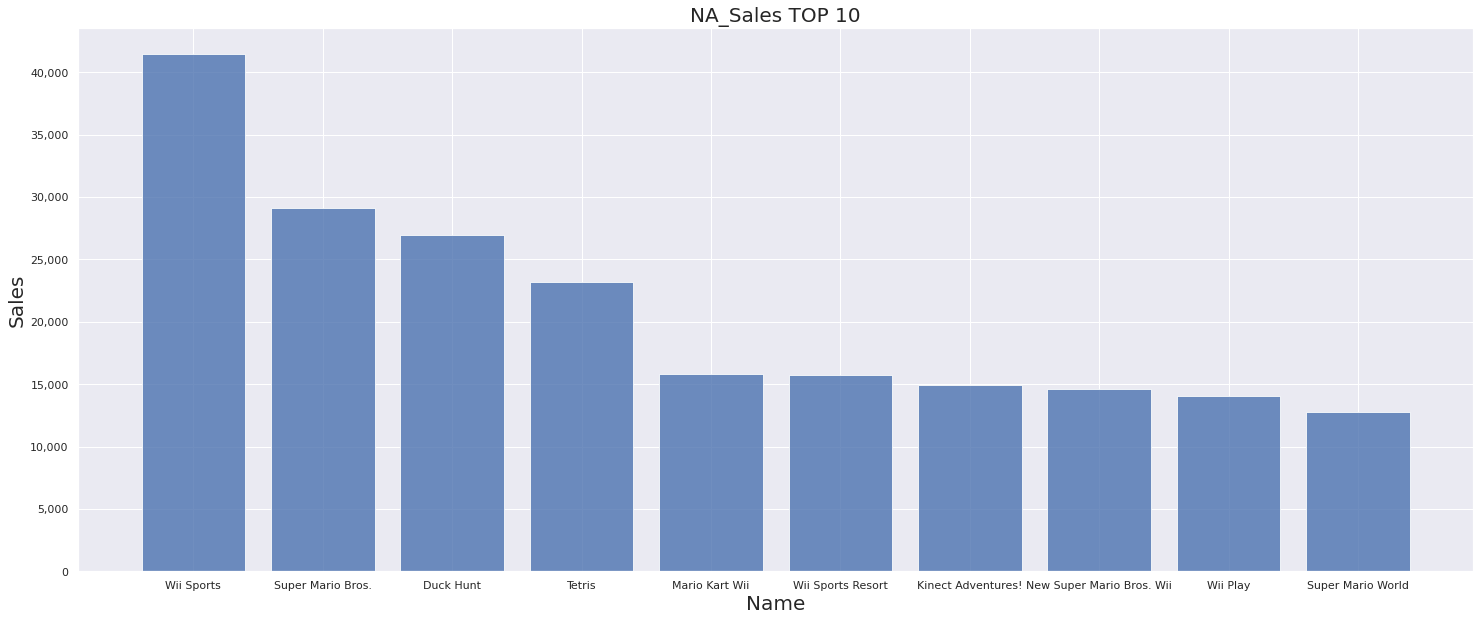

In [123]:
plt.figure(figsize=(25,10))
plt.bar(df_yn['Name'],df_yn['NA_Sales'], color='b', alpha=0.8)
plt.xlabel('Name', fontsize=20)
plt.ylabel('Sales', fontsize=20)
current = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current])
plt.title('NA_Sales TOP 10', fontsize=20)
plt.show()

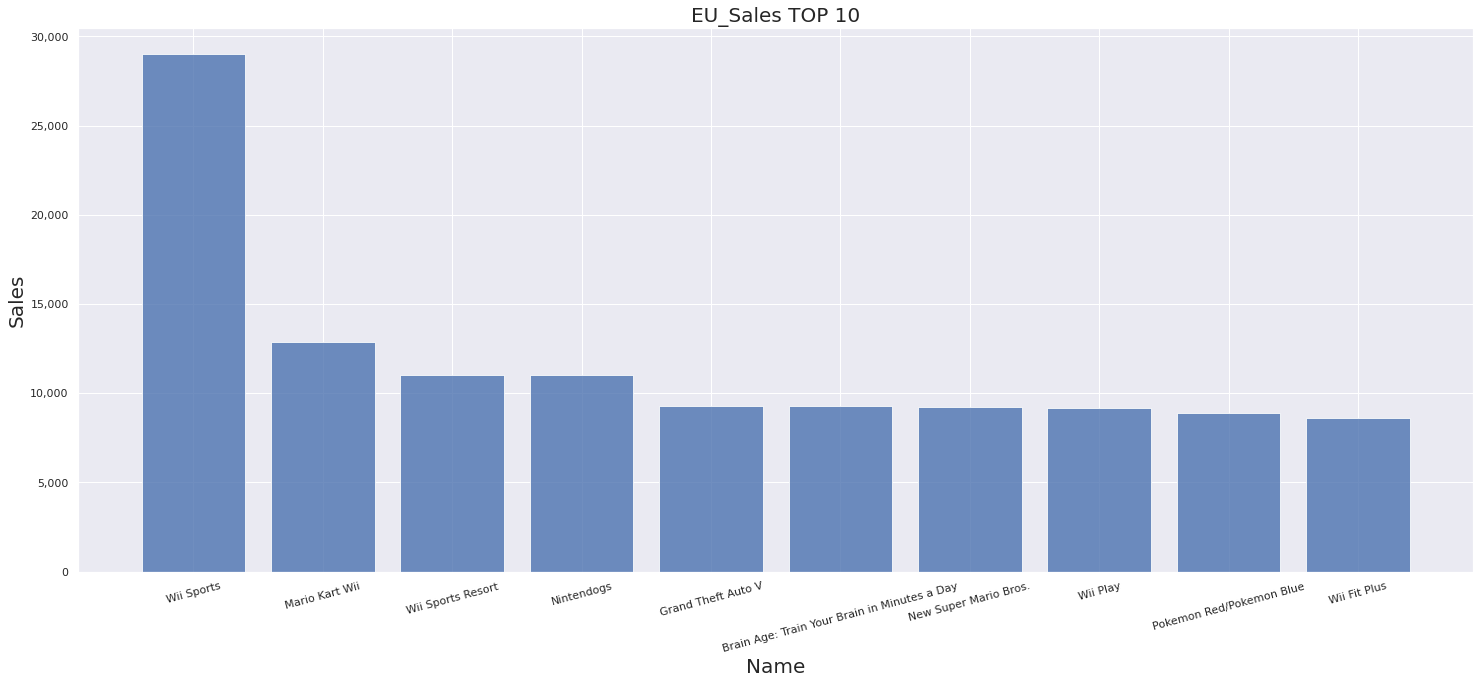

In [129]:
plt.figure(figsize=(25,10))
plt.bar(df_yn2['Name'],df_yn2['EU_Sales'], color='b', alpha=0.8)
plt.xlabel('Name', fontsize=20)
plt.ylabel('Sales', fontsize=20)
current = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current])
plt.title('EU_Sales TOP 10', fontsize=20)
plt.xticks(rotation=15)
plt.show()

## 2. df_region

In [56]:
df_region

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,Action,Destineer,40,0,0,0
1,The Munchables,Wii,Action,Namco Bandai Games,170,0,0,10
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0,0,20,0
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,40,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,120,90,0,40
...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,Platform,Vivendi Games,150,40,0,10
16593,Rainbow Islands: Revolution,PSP,Action,Rising Star Games,10,0,0,0
16594,NBA 2K16,PS3,Sports,Take-Two Interactive,440,190,30,130
16595,Toukiden: The Age of Demons,PSV,Action,Tecmo Koei,50,50,250,30


* 칼럼 : platform, genre, publisher, sales

</br>

- platform - genre : 플랫폼별 장르별 발매수
- platform - sales : 플랫폼별 지역별 매출액
- genre - sales : 장르별 지역별 매출액
- publisher - sales : 제작사별 지역별 매출액

### 1) platform - genre

플랫폼별 장르별 발매수

Text(0.5, 1.0, 'Platform-Genre')

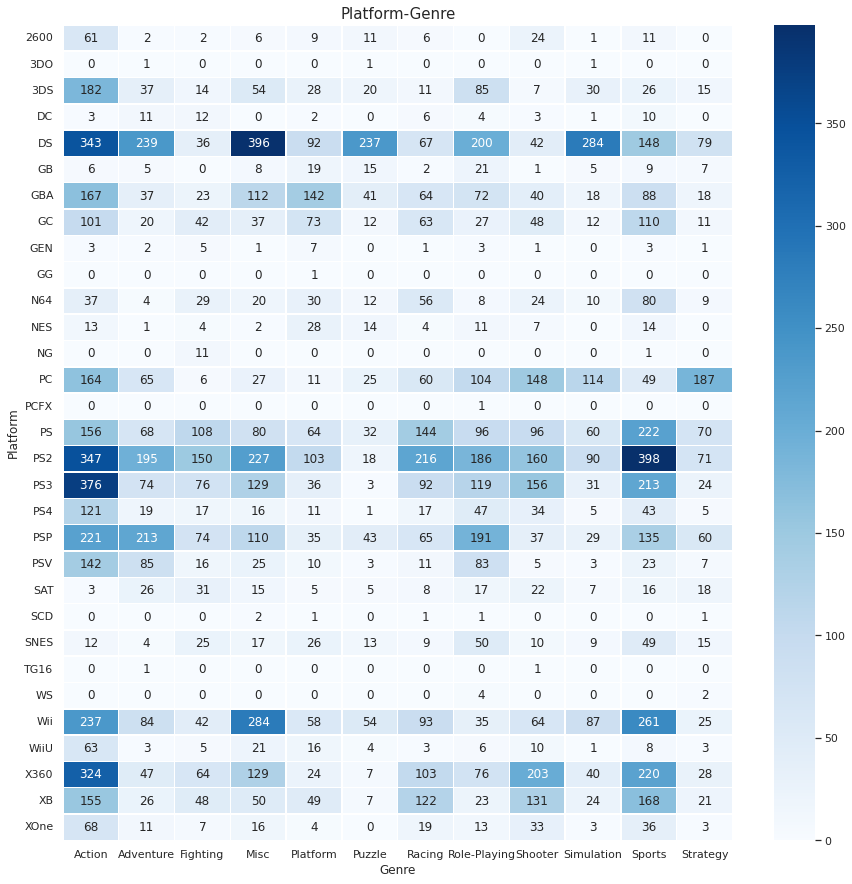

In [57]:
df_pg = df_region[['Platform','Genre','Name']]
df_pg = df_pg.groupby(['Platform','Genre'], as_index=False)['Name'].count()
df_pg_pivot = df_pg.pivot_table(values='Name', index='Platform', columns='Genre', fill_value=0)

plt.figure(figsize=(15,15))
sns.heatmap(df_pg_pivot, annot=True, fmt='d', linewidths=0.5, cmap='Blues')
plt.title('Platform-Genre', fontsize=15)

* 해석

ps 시리즈와 xb 시리즈, 닌텐도 시리즈 모두 액션과 스포츠, misc 장르에 집중적으로 발매를 하고 있다.

### 2) platform - sales

플랫폼별 지역별 매출액

In [58]:
df_ps = df_region[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_ps = df_ps.groupby('Platform', as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
df_ps = df_ps.query('NA_Sales >= 100000')
df_ps = df_ps.sort_values('NA_Sales', ascending=False)
df_ps.reset_index(drop=True, inplace=True)
df_ps.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,X360,601049,280580,12430,85540
1,PS2,583838,339289,139200,193440
2,Wii,507710,268379,69330,80610
3,PS3,392259,343710,79990,141929
4,DS,390710,194650,175570,60530


In [67]:
df_ps['NA_Sales'] = np.array(df_ps['NA_Sales'])
df_ps['EU_Sales'] = np.array(df_ps['EU_Sales'])
df_ps['JP_Sales'] = np.array(df_ps['JP_Sales'])
df_ps['Other_Sales'] = np.array(df_ps['Other_Sales'])

bottom1 = np.add(df_ps['NA_Sales'], df_ps['EU_Sales'])
bottom2 = np.add(bottom1, df_ps['JP_Sales'])

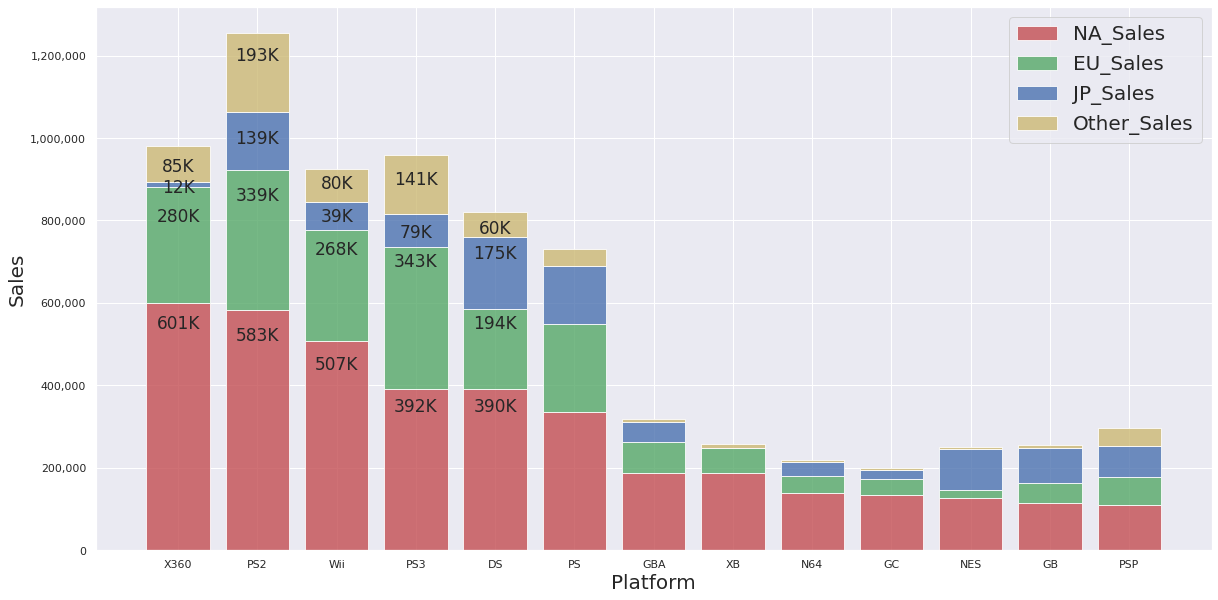

In [75]:
plt.figure(figsize=(20,10))
plt.bar(df_ps['Platform'],df_ps['NA_Sales'], color='r', alpha=0.8)
plt.bar(df_ps['Platform'],df_ps['EU_Sales'], color='g', alpha=0.8, bottom=df_ps['NA_Sales'])
plt.bar(df_ps['Platform'],df_ps['JP_Sales'], color='b', alpha=0.8, bottom=bottom1)
plt.bar(df_ps['Platform'],df_ps['Other_Sales'], color='y', alpha=0.8, bottom=bottom2)
plt.xlabel('Platform', fontsize=20)
plt.ylabel('Sales', fontsize=20)
current = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current])
plt.annotate('601K',('X360',550000), va='center', ha='center', fontsize=17)
plt.annotate('280K',('X360',810000), va='center', ha='center', fontsize=17)
plt.annotate('12K',('X360',880000), va='center', ha='center', fontsize=17)
plt.annotate('85K',('X360',930000), va='center', ha='center', fontsize=17)

plt.annotate('583K',('PS2',520000), va='center', ha='center', fontsize=17)
plt.annotate('339K',('PS2',860000), va='center', ha='center', fontsize=17)
plt.annotate('139K',('PS2',1000000), va='center', ha='center', fontsize=17)
plt.annotate('193K',('PS2',1200000), va='center', ha='center', fontsize=17)

plt.annotate('507K',('Wii',450000), va='center', ha='center', fontsize=17)
plt.annotate('268K',('Wii',730000), va='center', ha='center', fontsize=17)
plt.annotate('39K',('Wii',810000), va='center', ha='center', fontsize=17)
plt.annotate('80K',('Wii',890000), va='center', ha='center', fontsize=17)

plt.annotate('392K',('PS3',350000), va='center', ha='center', fontsize=17)
plt.annotate('343K',('PS3',700000), va='center', ha='center', fontsize=17)
plt.annotate('79K',('PS3',770000), va='center', ha='center', fontsize=17)
plt.annotate('141K',('PS3',900000), va='center', ha='center', fontsize=17)

plt.annotate('390K',('DS',350000), va='center', ha='center', fontsize=17)
plt.annotate('194K',('DS',550000), va='center', ha='center', fontsize=17)
plt.annotate('175K',('DS',720000), va='center', ha='center', fontsize=17)
plt.annotate('60K',('DS',780000), va='center', ha='center', fontsize=17)
plt.legend(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],fontsize=20)
plt.show()

* 해석

ps 시리즈의 총 매출액이 전 지역에서 가장 높으며 그 다음으로 닌텐도 시리즈, x360이다.

### 3) genre - sales

장르별 지역별 매출액

In [61]:
df_gs = df_region[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_gs = df_gs.groupby('Genre', as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
df_gs = df_gs.sort_values('NA_Sales', ascending=False)
df_gs.reset_index(drop=True, inplace=True)
df_gs.head(10)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874808,522158,157900,186449
1,Sports,680518,376479,135370,134670
2,Shooter,581919,313049,38260,102650
3,Platform,446440,201610,130650,51530
4,Misc,428660,225480,118150,79580
5,Racing,357188,237100,56400,77100
6,Role-Playing,319540,183580,344950,56960
7,Fighting,223198,101220,87340,36640
8,Simulation,182958,113350,63700,31480
9,Puzzle,123350,50730,56870,12520


In [62]:
df_gs['NA_Sales'] = np.array(df_gs['NA_Sales'])
df_gs['EU_Sales'] = np.array(df_gs['EU_Sales'])
df_gs['JP_Sales'] = np.array(df_gs['JP_Sales'])
df_gs['Other_Sales'] = np.array(df_gs['Other_Sales'])

bottom1 = np.add(df_gs['NA_Sales'], df_gs['EU_Sales'])
bottom2 = np.add(bottom1, df_gs['JP_Sales'])

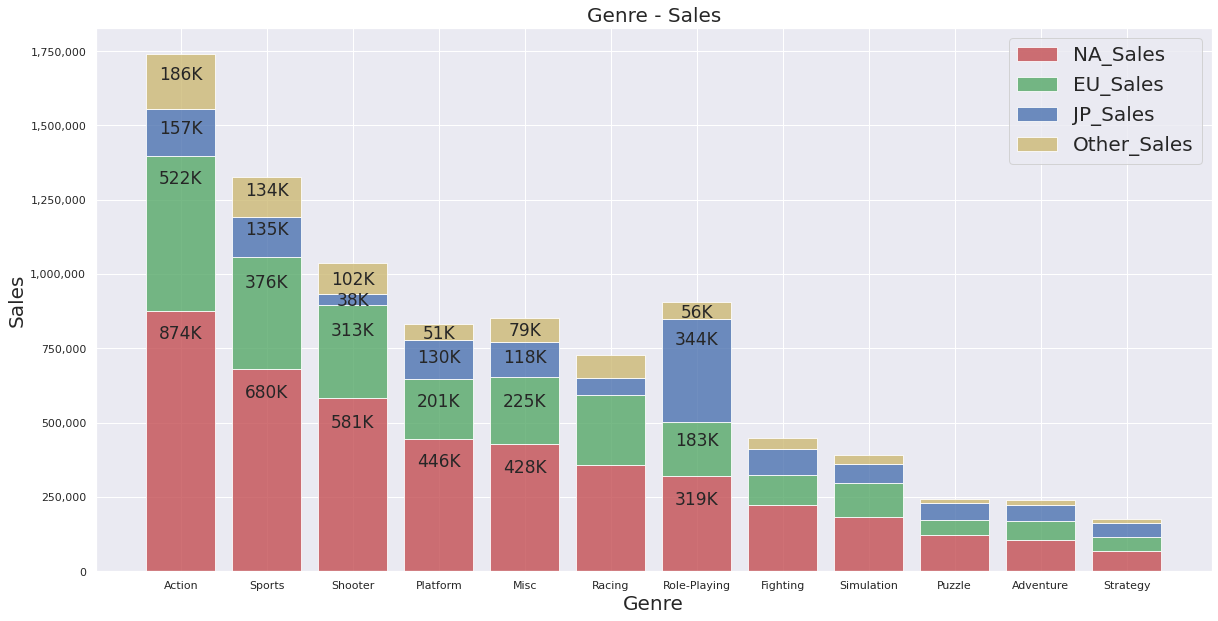

In [64]:
plt.figure(figsize=(20,10))
plt.bar(df_gs['Genre'],df_gs['NA_Sales'], color='r', alpha=0.8)
plt.bar(df_gs['Genre'],df_gs['EU_Sales'], color='g', alpha=0.8, bottom=df_gs['NA_Sales'])
plt.bar(df_gs['Genre'],df_gs['JP_Sales'], color='b', alpha=0.8, bottom=bottom1)
plt.bar(df_gs['Genre'],df_gs['Other_Sales'], color='y', alpha=0.8, bottom=bottom2)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Sales', fontsize=20)
current = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current])
plt.legend(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],fontsize=20)
plt.annotate('874K',('Action',800000), va='center', ha='center', fontsize=17)
plt.annotate('522K',('Action',1320000), va='center', ha='center', fontsize=17)
plt.annotate('157K',('Action',1490000), va='center', ha='center', fontsize=17)
plt.annotate('186K',('Action',1670000), va='center', ha='center', fontsize=17)

plt.annotate('680K',('Sports',600000), va='center', ha='center', fontsize=17)
plt.annotate('376K',('Sports',970000), va='center', ha='center', fontsize=17)
plt.annotate('135K',('Sports',1150000), va='center', ha='center', fontsize=17)
plt.annotate('134K',('Sports',1280000), va='center', ha='center', fontsize=17)

plt.annotate('581K',('Shooter',500000), va='center', ha='center', fontsize=17)
plt.annotate('313K',('Shooter',810000), va='center', ha='center', fontsize=17)
plt.annotate('38K',('Shooter',910000), va='center', ha='center', fontsize=17)
plt.annotate('102K',('Shooter',980000), va='center', ha='center', fontsize=17)

plt.annotate('446K',('Platform',370000), va='center', ha='center', fontsize=17)
plt.annotate('201K',('Platform',570000), va='center', ha='center', fontsize=17)
plt.annotate('130K',('Platform',720000), va='center', ha='center', fontsize=17)
plt.annotate('51K',('Platform',800000), va='center', ha='center', fontsize=17)

plt.annotate('428K',('Misc',350000), va='center', ha='center', fontsize=17)
plt.annotate('225K',('Misc',570000), va='center', ha='center', fontsize=17)
plt.annotate('118K',('Misc',720000), va='center', ha='center', fontsize=17)
plt.annotate('79K',('Misc',810000), va='center', ha='center', fontsize=17)

plt.annotate('319K',('Role-Playing',240000), va='center', ha='center', fontsize=17)
plt.annotate('183K',('Role-Playing',440000), va='center', ha='center', fontsize=17)
plt.annotate('344K',('Role-Playing',780000), va='center', ha='center', fontsize=17)
plt.annotate('56K',('Role-Playing',870000), va='center', ha='center', fontsize=17)
plt.title('Genre - Sales', fontsize=20)
plt.show()

* 해석

액션, 스포츠, 슈팅장르 순으로 매출액이 높으며 일본을 제외하면 액션장르의 매출액 비중이 가장 높다. 일본에서 가장 매출액이 높은 장르는 롤플레잉이다.

## summary

year - platform
-  ps는 90년대 중반부터 2010년 중반까지 활발하게 타이틀을 출시하고 있는 가운데, 2000년대 중반에 닌텐도가 폭발적으로 타이틀을 발매하였고 그 뒤를 이어 xb가 따르고 있다. pc의 경우 2000년대를 지나면서 발매가 늘었다가 2011년을 기점으로 다시 줄어드는 모습이다.

year - genre
- 2000년대로 들어오면서 다양한 장르의 게임이 출시되기 시작했다. 액션, 어드벤쳐, 롤플레잉, 스포츠, 기타 장르의 게임이 2010년까지 활발하게 출시되다가 2010년을 넘어서면 액션 장르의 게임이 주류로 자리잡게 되었다. 그 뒤를 이어 롤플레잉와 어드벤쳐, 스포츠 장르의 게임이 발매되고 있다.

year - sales
- 90년대 중반까지는 미국과 일본이 주요시장이었지만, 2000년을 넘어서면서 EU가 급부상하기 시작했다. 2005년부터 2010년까지 세계 게임시장의 호황기가 찾아왔으며 미국이 가장 큰 시장이고 그 뒤를 이어 EU가 차지했다.

year - platform - sales
- 90년대 중반부터 ps의 매출이 올라가고 ps2, ps3를 이어서 유지되고 있다. 2000년대 중반 ds의 매출이 급격히 올라갔지만 ps를 따라잡지는 못했다. 2010년대 초반에는 x360의 성장이 두드러진다. 일본의 경우 2010년대 이후 3ds의 매출이 크게 상승하였다.

year - genre - sales
- 2000년대부터 액션과 스포츠장르의 매출이 크게 뛰었다. 그 뒤를 이어 기타장르와 슈팅장르의 매출이 차지했다. 2010년 이후 액션장르의 매출이 떨어지면서 슈팅장르의 매출이 따라잡게 되었다. 일본의 경우 90년대부터 롤플레잉 장르의 강세가 이어지다 2015년 액션장르에게 역전되었다.

platform - genre
- ps 시리즈와 xb 시리즈, 닌텐도 시리즈 모두 액션과 스포츠, misc 장르에 집중적으로 발매를 하고 있다.

platform - sales
- ps 시리즈의 총 매출액이 전 지역에서 가장 높으며 그 다음으로 닌텐도 시리즈, x360이다.

genre - sales
- 액션, 스포츠, 슈팅장르 순으로 매출액이 높으며 일본을 제외하면 액션장르의 매출액 비중이 가장 높다. 일본에서 가장 매출액이 높은 장르는 롤플레잉이다.

# 다음 분기에 어떤 게임을 설계해야 하는가?

- 귀무가설 : 다른 플랫폼의 다른 장르의 게임을 개발해야한다.

- 대립가설 : 다음 분기에 미국과 유럽 지역에 발매하기 위해 ps4 플랫폼의 액션 장르의 게임을 개발해야한다.

In [166]:
df_pop = df_year[['Year','Platform','Genre','NA_Sales','EU_Sales']]
df_pop = df_pop.query('Year >= 1995')
df_na = df_pop.drop('EU_Sales', axis=1)
df_eu = df_pop.drop('NA_Sales', axis=1)

In [158]:
import random
random.seed(42)

action_means, other_means, diff_means = [], [], []

for _ in range(10000):
    sample = df_na.sample(df_na.shape[0], replace=True)

    action_mean = sample[sample.Genre == 'Action'].NA_Sales.mean()
    action_means.append(action_mean)

    other_mean = sample[sample.Genre != 'Action'].NA_Sales.mean()
    other_means.append(other_mean)

    diff_means.append(action_mean - other_mean)

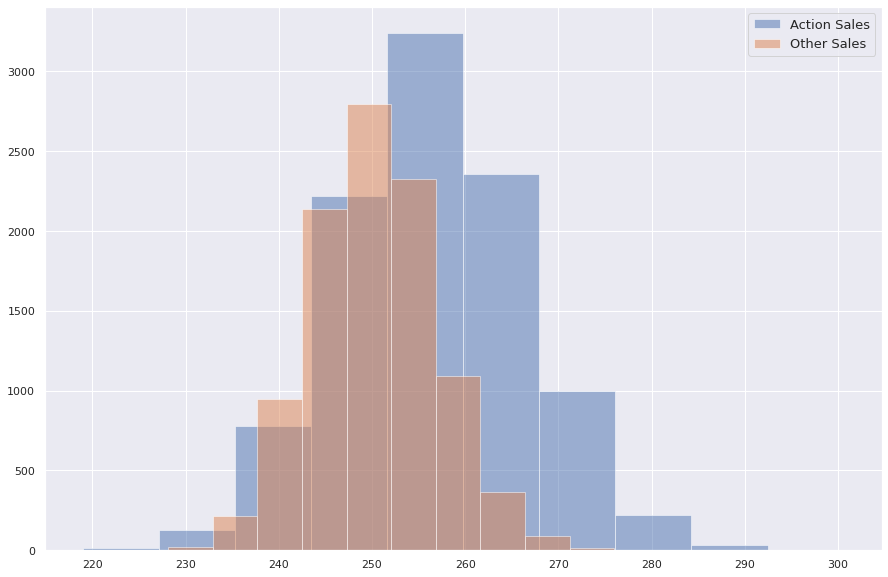

In [159]:
plt.figure(figsize=(15,10))
plt.hist(action_means, alpha = 0.5, label='Action Sales')
plt.hist(other_means, alpha = 0.5, label = 'Other Sales')
plt.legend(fontsize=13)
plt.show()

* 역대 출고량 10위 안에 있는 게임들 중 Action 장르가 없음에도 평균 매출액이 기타 장르 평균 매출액을 상회하고 있다.

* 따라서 Action 장르의 게임을 개발해야한다.